In [1]:
import sys
import os

import torch 
torch.cuda.empty_cache()

sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../models'))
sys.path.append(os.path.abspath('../dataset_generation'))

from NN_TopOpt import SIMP_basic
from TopOpt import TopOptimizer2D
import yaml

methods = {
    "simp_basic": SIMP_basic,
}

Info    : Reading '../test_problems/MBB_beam_half.msh'...
Info    : 9 entities
Info    : 5710 nodes
Info    : 11098 elements
Info    : Done reading '../test_problems/MBB_beam_half.msh'
Compute areas ...


100%|██████████| 11098/11098 [00:00<00:00, 223457.28it/s]


Whole area 0.48


100%|██████████| 11098/11098 [00:00<00:00, 32752.90it/s]


Fixed case:  fixed_x [0, [0, 0.4]] 41 5710
Fixed case:  fixed_y [1.2, 0] 1 121
Loaded loads:  (1,)
check dv 0 0.7343621300583488
Build filter matrix ...


100%|██████████| 11098/11098 [00:00<00:00, 12455.78it/s]


Iteration: 1 | current volfrac: 0.440039 | compliance: 0.008511
Iteration: 2 | current volfrac: 0.439919 | compliance: 0.004810
Iteration: 3 | current volfrac: 0.440151 | compliance: 0.003353
Iteration: 4 | current volfrac: 0.439849 | compliance: 0.002661
Iteration: 5 | current volfrac: 0.440065 | compliance: 0.002400
Iteration: 6 | current volfrac: 0.440022 | compliance: 0.002220
Iteration: 7 | current volfrac: 0.439910 | compliance: 0.002086
Iteration: 8 | current volfrac: 0.440141 | compliance: 0.001956
Iteration: 9 | current volfrac: 0.439955 | compliance: 0.001829
Iteration: 10 | current volfrac: 0.439881 | compliance: 0.001705
Iteration: 11 | current volfrac: 0.439913 | compliance: 0.001589
Iteration: 12 | current volfrac: 0.440010 | compliance: 0.001489
Iteration: 13 | current volfrac: 0.440027 | compliance: 0.001419
Iteration: 14 | current volfrac: 0.439942 | compliance: 0.001365
Iteration: 15 | current volfrac: 0.440035 | compliance: 0.001329
Iteration: 16 | current volfrac: 0

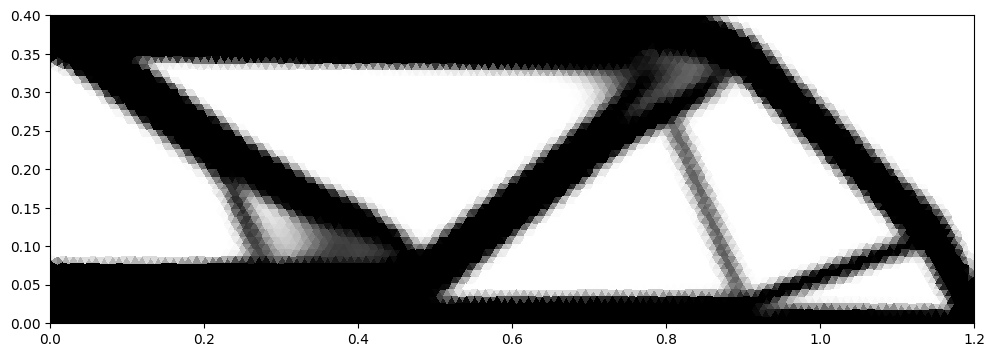

Iteration: 20 | current volfrac: 0.440035 | compliance: 0.001264
Iteration: 21 | current volfrac: 0.439985 | compliance: 0.001261
Iteration: 22 | current volfrac: 0.439928 | compliance: 0.001259
Iteration: 23 | current volfrac: 0.440070 | compliance: 0.001257
Iteration: 24 | current volfrac: 0.440020 | compliance: 0.001255
Iteration: 25 | current volfrac: 0.440009 | compliance: 0.001254
Iteration: 26 | current volfrac: 0.439968 | compliance: 0.001253
Iteration: 27 | current volfrac: 0.439987 | compliance: 0.001253
Iteration: 28 | current volfrac: 0.439968 | compliance: 0.001253
Iteration: 29 | current volfrac: 0.439961 | compliance: 0.001252
Iteration: 30 | current volfrac: 0.440056 | compliance: 0.001252
Iteration: 31 | current volfrac: 0.440036 | compliance: 0.001251
Iteration: 32 | current volfrac: 0.440016 | compliance: 0.001251
Iteration: 33 | current volfrac: 0.439946 | compliance: 0.001251
Iteration: 34 | current volfrac: 0.439983 | compliance: 0.001250
Iteration: 35 | current v

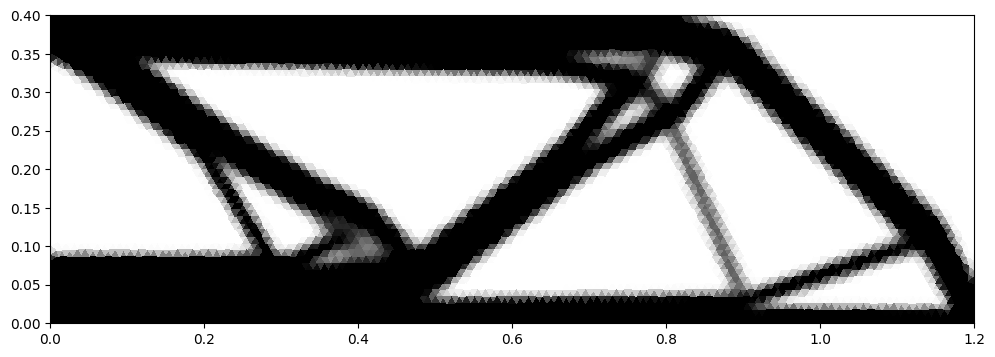

Computing stresses: 100%|██████████| 11098/11098 [00:00<00:00, 119442.12it/s]


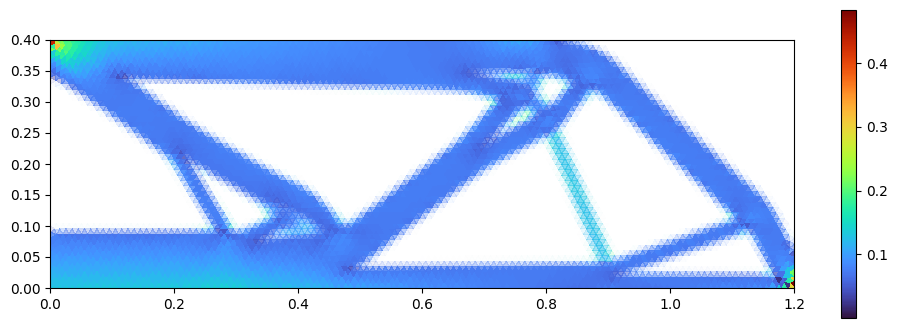

In [2]:
experiment_dir = "../configs/NN_top_optimization/SIMP_basic"

# select config
config_name = "MBB_beam_half" 
# config_name = "MBB_beam_half_hrez" 
# config_name = "Cant_beam"
# config_name = "Cant_beam_distrL"
# config_name = "Brecket"

config_path = f"{experiment_dir}/{config_name}.yaml"

with open(config_path, 'r') as file:
    config = yaml.safe_load(file)

params = config['params']
TopOptimizer = TopOptimizer2D(methods, params)
TopOptimizer.optimize(plot_interval=20)